# Import Data & Python Packages

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn import datasets, neighbors
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [15]:
# load dataset
House_Grade = pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
House_Grade

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [16]:
House_Grade.columns = ['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms', 'roof', 'Roof(Area)', 'Lawn(Area)','Nfloors','API','ANB','Expected price','Grade']
House_Grade.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [17]:
House_Grade.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [18]:
#explore the numeric data types
House_Grade.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [8]:
#average numbers for all columns
House_Grade.groupby('Grade').mean()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
Grade,,,,,,,,,,,,
A,1563.228070,330.343358,8.952381,7.466165,7.057644,8.566416,62.303258,96.578947,6.045113,71.857143,3.533835,4456.583960
B,1438.842301,326.866419,8.437848,6.372913,5.862709,7.374768,53.825603,95.649351,5.421150,71.775510,3.435993,4247.224490
C,1512.629888,328.505587,7.250000,5.240223,4.727654,6.222067,53.717877,96.611732,4.243017,71.509777,3.611732,3887.370112
D,1500.308661,322.048031,5.800000,3.703150,3.173228,4.665354,42.516535,95.203937,2.761417,69.155906,3.422047,3360.353543
E,1497.381579,304.631579,5.105263,2.631579,1.973684,3.407895,8.065789,87.565789,2.118421,55.065789,3.197368,3031.289474


<AxesSubplot:xlabel='Id', ylabel='Grade'>

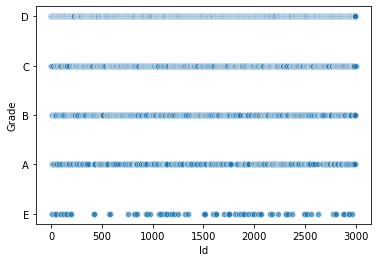

In [59]:
sns.scatterplot(x = 'Id', y = 'Grade',data = House_Grade,alpha = .7)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
x = House_Grade.drop('Grade',axis = 1)
y = House_Grade['Grade']

In [28]:
print(x,y)

        Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0        1          339       6          5            4           6   NO   
1        2          358       5          4            3           4  YES   
2        3          324       7          5            4           5  YES   
3        4          330       6          4            3           5  YES   
4        5          320       7          4            4           5   NO   
...    ...          ...     ...        ...          ...         ...  ...   
2995  2996          341       9          6            5           7  YES   
2996  2997          292       9          8            7           8  YES   
2997  2998          328       7          4            3           5   NO   
2998  2999          293       9          7            7           8   NO   
2999  3000          343       7          6            6           8   NO   

      Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price  
0              0     

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size = .8,random_state = 100)

In [30]:
scaler = StandardScaler()

In [32]:
print(scaler)

StandardScaler()


In [39]:
scaler

StandardScaler()

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [42]:
x_train

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
1803,1804,323,6,5,4,6,NO,0,78,3,74,6,3472
2803,2804,291,6,4,3,4,YES,98,71,4,86,5,2969
2793,2794,328,8,7,6,8,NO,0,105,4,85,3,3979
745,746,334,8,7,6,8,YES,91,76,6,96,3,4309
662,663,353,7,5,4,6,NO,0,75,4,45,4,3777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,1931,313,8,5,4,6,NO,0,104,4,61,4,4418
79,80,306,6,5,5,7,YES,74,115,4,56,1,3070
1859,1860,299,8,5,5,6,NO,0,92,4,51,2,4020
2840,2841,306,7,5,5,6,NO,0,115,3,73,1,4056


In [43]:
x_test

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
1273,1274,308,6,4,4,5,NO,0,76,4,88,2,3406
1380,1381,330,6,3,2,3,YES,106,108,2,74,4,3394
356,357,316,8,5,5,6,NO,0,73,5,85,1,3759
1920,1921,298,5,4,4,6,YES,118,92,3,88,5,2730
561,562,344,7,4,3,5,NO,0,112,5,98,2,3925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,1572,344,7,5,5,6,NO,0,85,3,73,6,3630
2296,2297,301,9,7,7,9,YES,110,101,7,100,5,3911
812,813,297,5,3,3,4,NO,0,91,3,74,4,3074
2353,2354,358,9,8,8,9,NO,0,108,6,53,5,4639


In [44]:
y_train

1803    D
2803    D
2793    B
745     B
662     D
       ..
1930    C
79      D
1859    D
2840    D
1544    D
Name: Grade, Length: 600, dtype: object

In [45]:
y_test

1273    D
1380    D
356     C
1920    D
561     C
       ..
1571    C
2296    A
812     E
2353    A
543     D
Name: Grade, Length: 2400, dtype: object

# UNDERSTANDING THE KNN CHOSING K VALUE

In [50]:
full_test = pd.concat([x_test,y_test],axis = 1)

In [51]:
full_test

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
1273,1274,308,6,4,4,5,NO,0,76,4,88,2,3406,D
1380,1381,330,6,3,2,3,YES,106,108,2,74,4,3394,D
356,357,316,8,5,5,6,NO,0,73,5,85,1,3759,C
1920,1921,298,5,4,4,6,YES,118,92,3,88,5,2730,D
561,562,344,7,4,3,5,NO,0,112,5,98,2,3925,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,1572,344,7,5,5,6,NO,0,85,3,73,6,3630,C
2296,2297,301,9,7,7,9,YES,110,101,7,100,5,3911,A
812,813,297,5,3,3,4,NO,0,91,3,74,4,3074,E
2353,2354,358,9,8,8,9,NO,0,108,6,53,5,4639,A


In [52]:
len(full_test)

2400

<AxesSubplot:xlabel='Id', ylabel='Grade'>

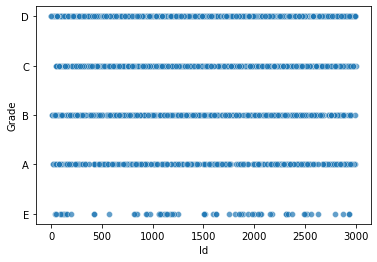

In [57]:
sns.scatterplot(x = 'Id', y = 'Grade',data = full_test,alpha = .7)

# MODEL EVALUATION

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

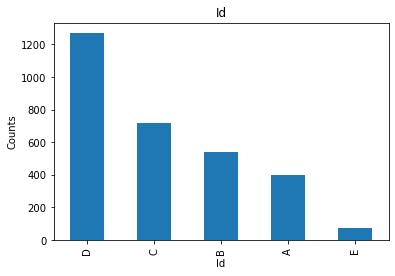

In [70]:
House_Grade['Grade'].value_counts().plot(kind = 'bar')
plt.title('Id')
plt.xlabel('Id')
plt.ylabel('Counts')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

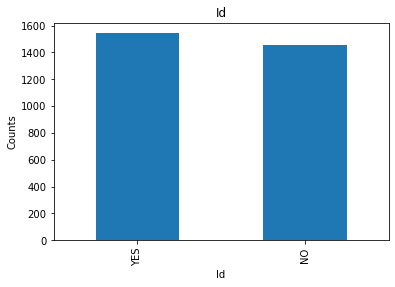

In [75]:
House_Grade['roof'].value_counts().plot(kind = 'bar')
plt.title('Id')
plt.xlabel('Id')
plt.ylabel('Counts')
sns.despine